<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
Index(['RowNumber', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrC

C:\Users\Acer\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Acer\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:1659: FutureWar

       principal_components_1  principal_components_2
1                    1.429276               -1.545088
2                    1.549292                0.513547
3                    1.589160               -0.931278
4                    1.533453               -1.843924
5                    1.557401                0.860555
...                       ...                     ...
9996                -1.413505               -1.600610
9997                -1.534420               -0.917651
9998                 1.287976               -1.625879
9999                -1.026527                1.563093
10000                1.389566               -0.638573

[10000 rows x 2 columns]
(10000, 2) (10000,)
       Principal_component_1  Principal_component_2  Principal_component_3  \
1                   1.429276              -1.545088              -0.499850   
2                   1.549292               0.513547               1.789972   
3                   1.589160              -0.931278              -0.6444

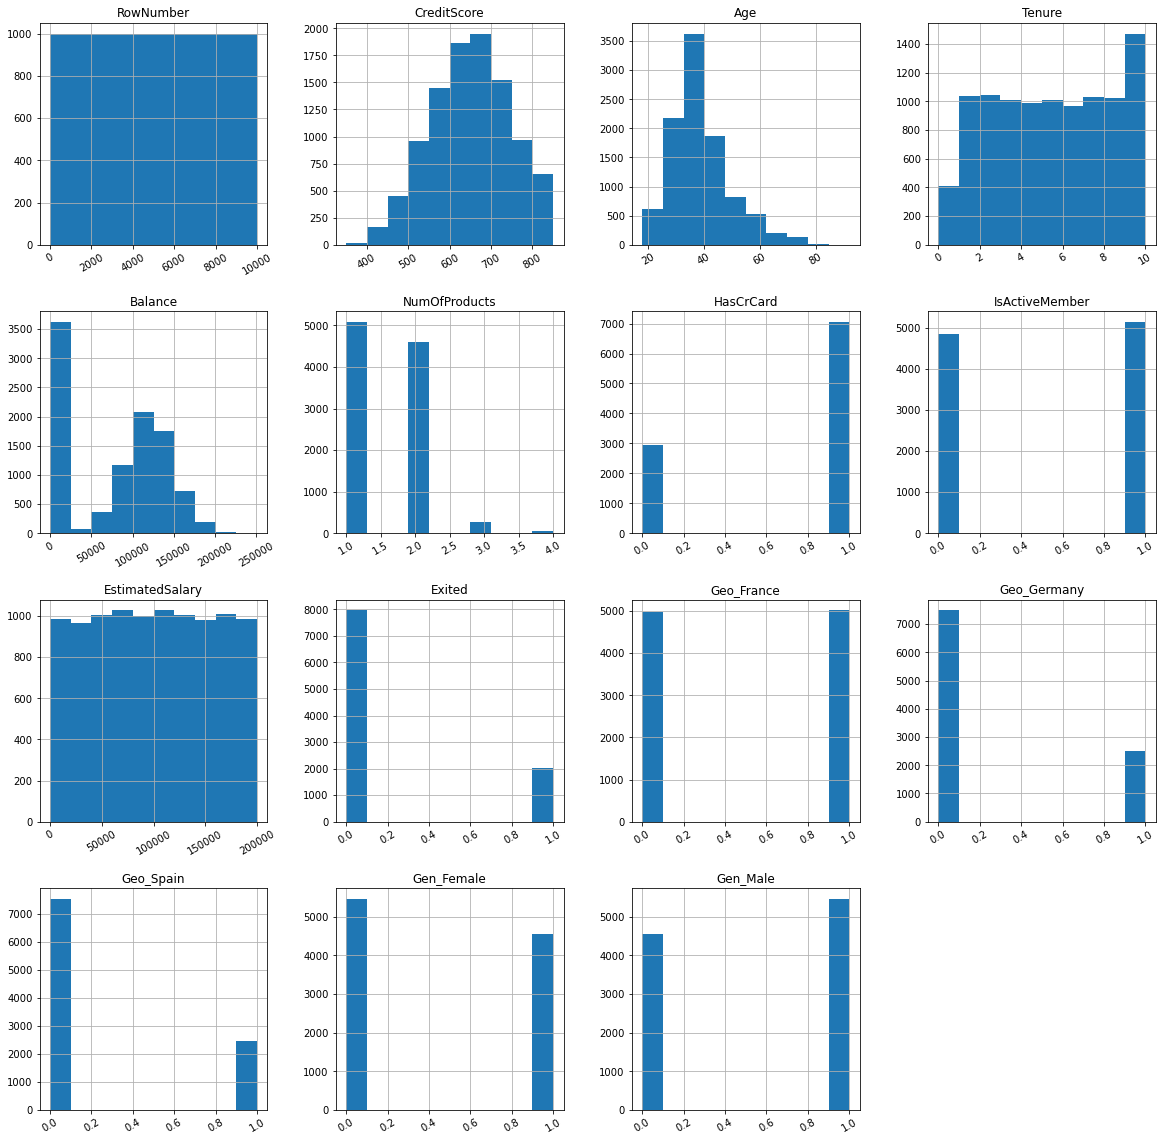

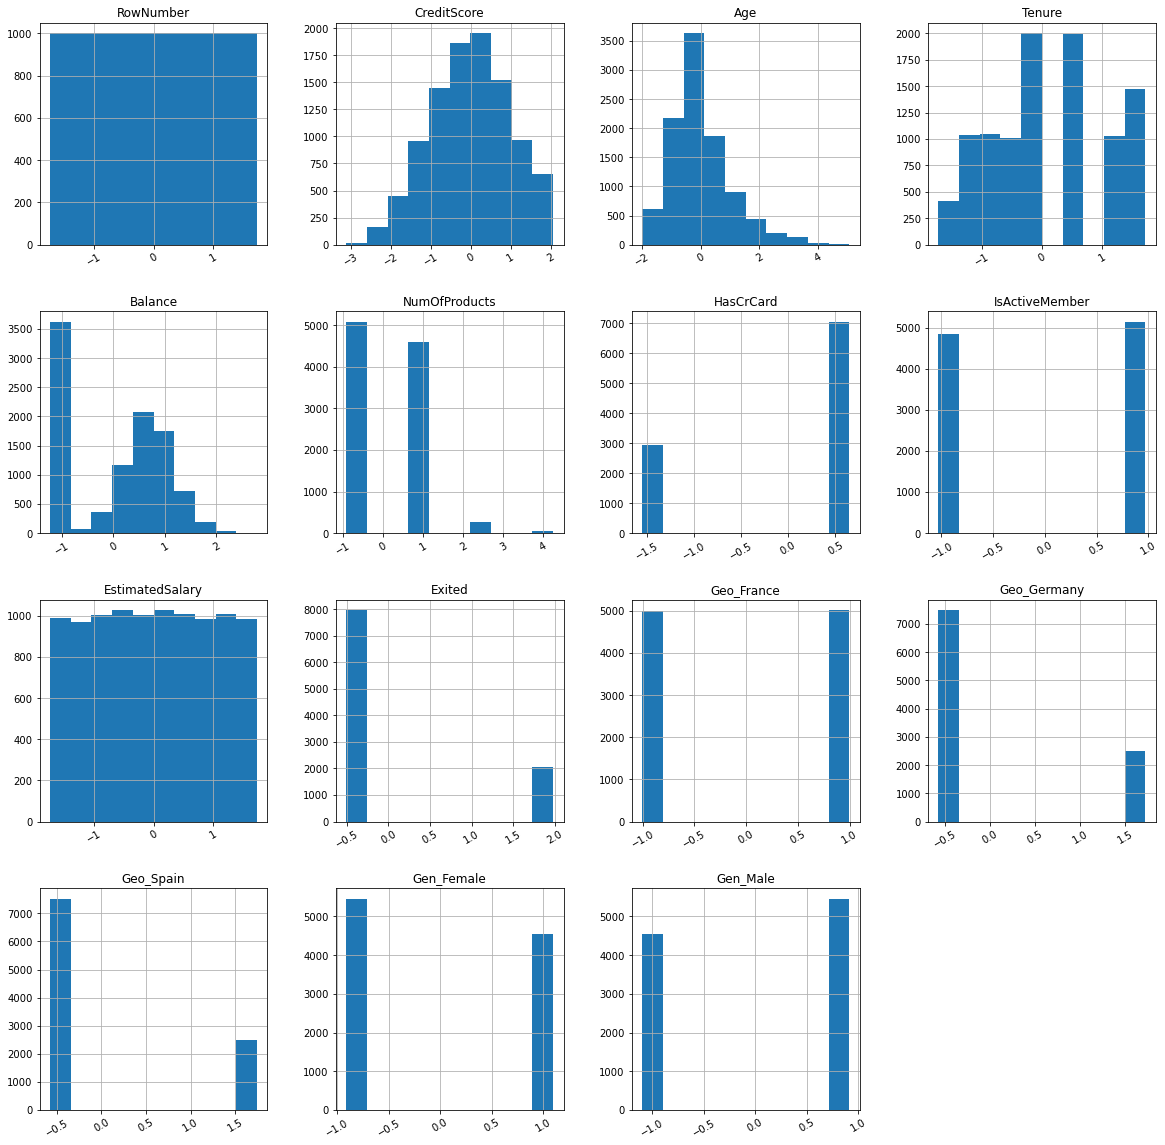

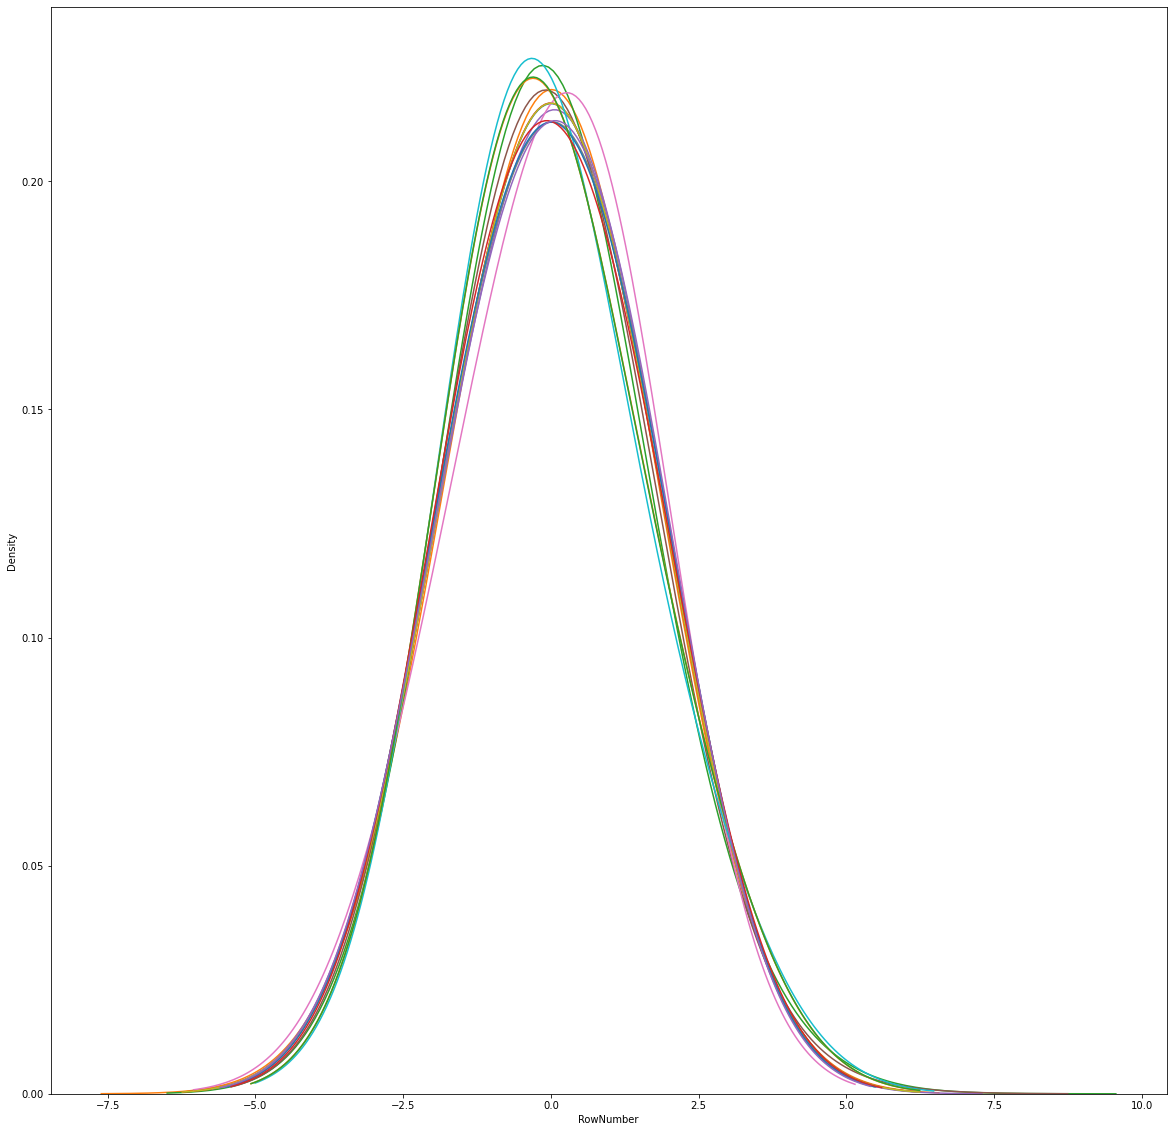

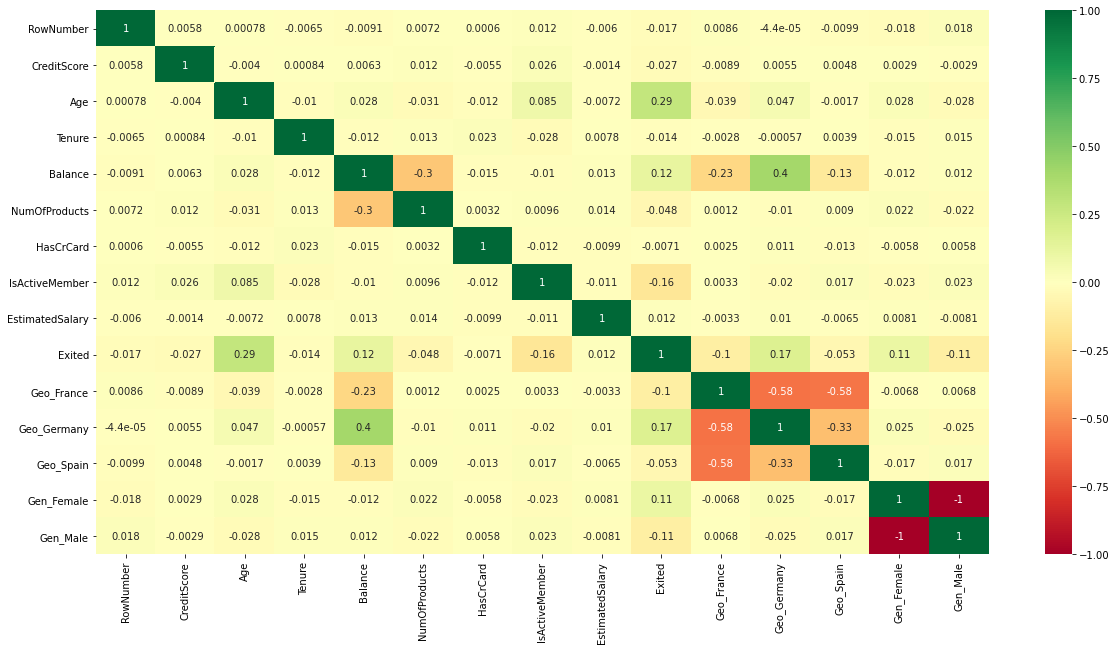

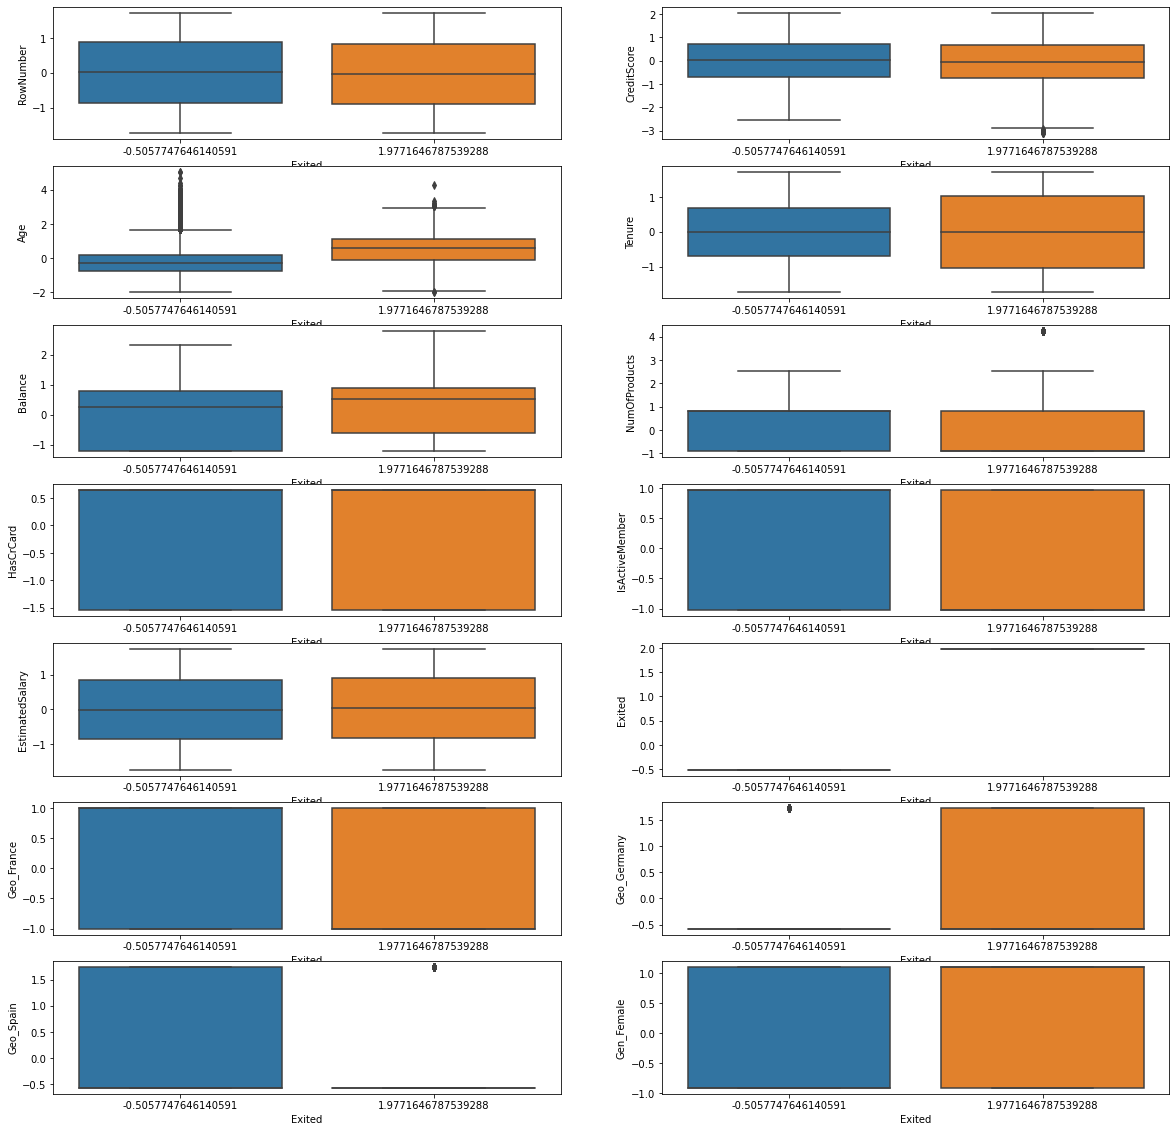

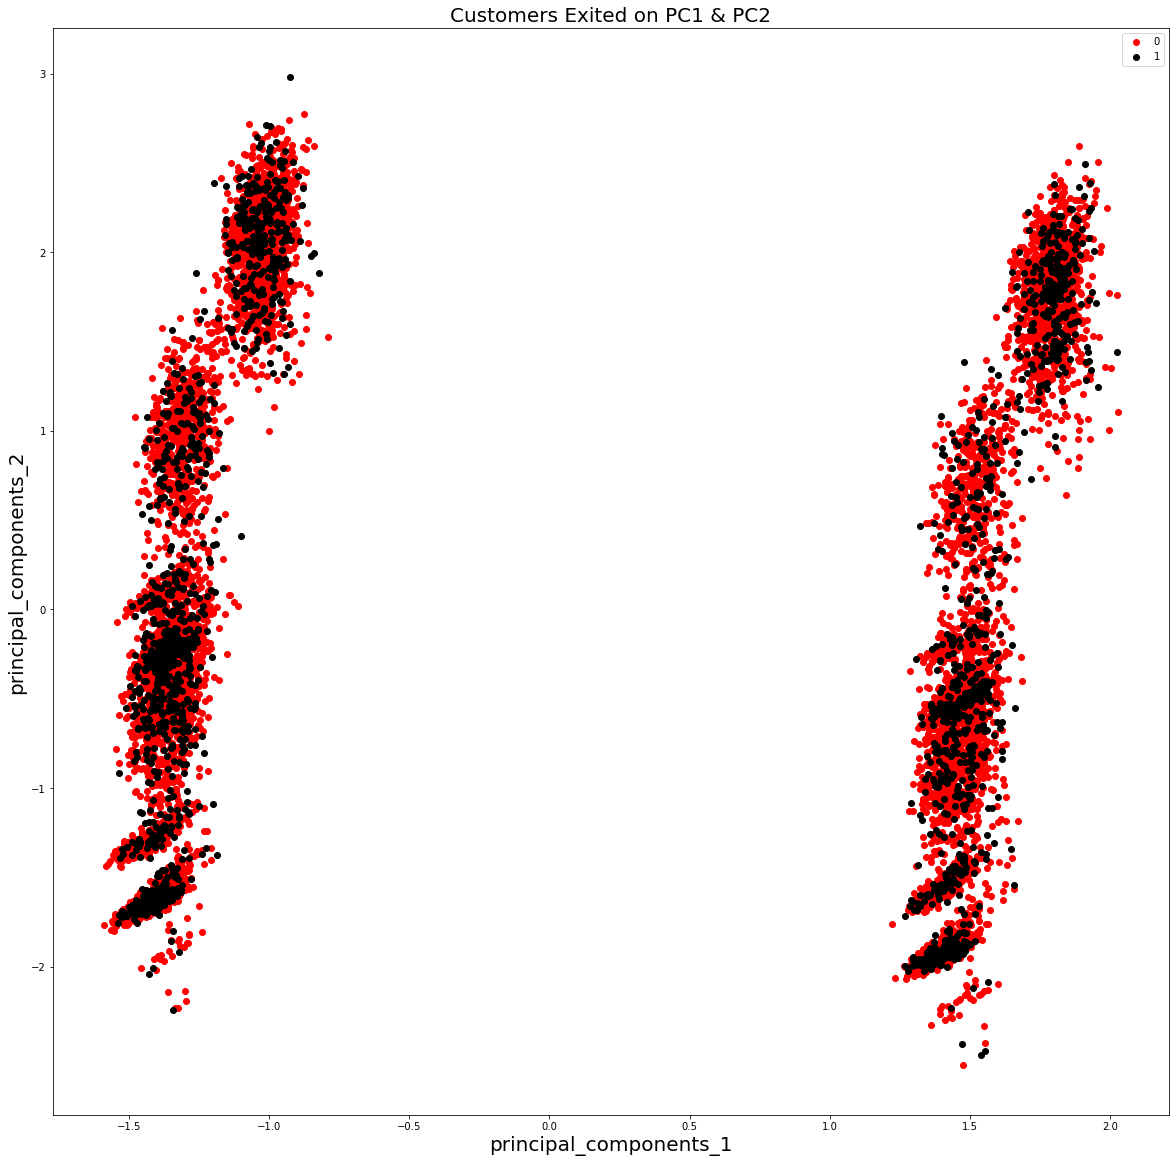

In [115]:
# -*- coding: utf-8 -*-
"""Untitled0.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ElRcJu_E8wqqc6MQS6ttx3CumfEk49tp
"""

# from google.colab import drive
# drive.mount('/content/drive')

import os
import numpy as np
import pandas as pd

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, linear_model
from sklearn.neural_network import MLPClassifier


NUM_PATH="C:/Users/Acer/pythonProject2/Churn_Modelling.csv"
# Importing data into python from the given csv file
dataset= pd.read_csv(NUM_PATH)

dataset.head()

dataset.tail()

dataset.dtypes

dataset.info()

dataset.columns

dataset.describe()

dataset.CreditScore.value_counts()

dataset.CreditScore.isna().any()

dataset.drop(labels=['CustomerId','Surname'],
                axis=1,
                inplace=True)

dataset.head()

dataset.Geography.value_counts(dropna=False)

dataset.Gender.value_counts(dropna=False)

dataset_cleaned = pd.get_dummies(dataset, 
                                    prefix=['Geo','Gen'], 
                                    prefix_sep='_',
                                    dummy_na=False, 
                                    columns=['Geography','Gender'],
                                    sparse=False,
                                    drop_first=False,
                                    dtype=int)

dataset_cleaned

dataset.isna().any()

dataset.corr()

dataset_cleaned.hist(bins=10,
                        figsize=(20,20),
                        xrot=30)

from sklearn import preprocessing

labels=dataset_cleaned.columns
print(labels)
scaler=preprocessing.StandardScaler()
scaled_dataset_cleaned=scaler.fit_transform(dataset_cleaned)

scaled_dataset_cleaned=pd.DataFrame(scaled_dataset_cleaned)
scaled_dataset_cleaned.columns=labels

scaled_dataset_cleaned.hist(bins=10,
                               figsize=(20,20),
                               xrot=30)

fig,ax = plt.subplots(1,1,figsize=(20,20))
for i in scaled_dataset_cleaned.columns:
    sns.kdeplot(scaled_dataset_cleaned[i],
                 label=[i],
                 bw=1.5,
                 ax=ax)

corr=scaled_dataset_cleaned.corr()

fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.heatmap(corr,
            annot=True,
            cmap='RdYlGn',
            ax=ax)

nr=7
nc=2
fig,ax=plt.subplots(nrows=nr,ncols=nc,figsize=(20,20))
i=0
for j in range(nr):
    for k in range(nc):
        axes=ax[j,k]
        
        sns.boxplot(x=scaled_dataset_cleaned['Exited'],
                    y=scaled_dataset_cleaned.iloc[:,i],
                    ax=axes)
        i+=1

scaled_dataset_cleaned=scaled_dataset_cleaned.drop('Exited',
                                                         axis=1)

scaled_dataset_cleaned.columns

from sklearn.decomposition import PCA

n_comp = 2
pca=PCA(n_components=n_comp)
principal_components=pca.fit_transform(scaled_dataset_cleaned)
len(principal_components)

pc_df=pd.DataFrame(principal_components,
                  columns=['principal_components_%s'%(i+1) for i in range(n_comp)],
                  index=range(1,len(principal_components)+1))
print(pc_df)

input_components=pc_df
output_components=dataset.Exited
print(input_components.shape,output_components.shape)
final_df=pd.concat([input_components,output_components],axis=1)

fig,ax=plt.subplots(1,1,figsize=(20,20))
ax.set_xlabel('principal_components_1',fontsize=20)
ax.set_ylabel('principal_components_2',fontsize=20)
ax.set_title('Customers Exited on PC1 & PC2',fontsize=20)

Targets=[0,1]
colors=['r','k']

for target,color in zip(Targets,colors):
    index_no_target=final_df['Exited']==target
    ax.scatter(final_df.loc[index_no_target,'principal_components_1'],
               final_df.loc[index_no_target,'principal_components_2'],
              c=color)
    ax.legend(Targets)
    ax.grid()

pca.explained_variance_ratio_

n_comp=10
pca_10=PCA(n_components=n_comp)
pca10_comp=pca_10.fit_transform(scaled_dataset_cleaned)
df_PCA_10=pd.DataFrame(pca10_comp,
                       columns=['Principal_component_%s'%(i+1) for i in range(n_comp)],
                      index=range(1,len(pca10_comp)+1))
print(df_PCA_10)

sum(pca_10.explained_variance_ratio_)

#Test Train split of the datdset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(df_PCA_10,output_components,test_size=0.2,random_state=1)
x_tr,x_val,y_tr,y_val=model_selection.train_test_split(x_train,y_train,test_size=0.2)

# best_score = 0
from sklearn import preprocessing, svm
from sklearn.metrics import f1_score, confusion_matrix

# krn=['linear', 'poly', 'rbf', 'sigmoid']
# rng_C=np.arange(1, 52, 10)
# rng_deg=np.arange(3, 8)
# rng_co=np.arange(0.001, 10, 0.5)
# rng_gam=['auto', 'scale']


# for i in krn:
#     for j in rng_C:
#         for k in rng_deg:
#             for z in rng_co:
#                 for x in rng_gam:
clf_SVM = svm.SVC(kernel='rbf', C =10, coef0= 0.001, gamma= 'auto')
clf_SVM.fit(x_train, y_train)
accuracy = clf_SVM.score(x_test, y_test)
y_score1= clf_SVM.predict(x_test)
                    # if best_score<accuracy:
                    #     best_score=accuracy
                    #     bi=i
                    #     bj=j
                    #     bk=k
                    #     bz=z
                    #     bx=x
                        
# cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
#                          index=['Predict Positive:1', 'Predict Negative:0'])
# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
print(f"Accuracy is : ",metrics.accuracy_score(y_test, y_score1))
print("ROC_AUC is : {:.4f} ".format( roc_auc_score(y_test, y_score1)))
print("f1 score of pridiction is : {:.4f}".format( f1_score(y_test,y_score1,average = 'macro')))
print("pridiction: ",y_score1)
print("confusion matrix: ",cm)
# print(classification_report(y_test, y_score1))

# mlp=MLPClassifier(activation="relu",max_iter=3000)
# mlp.fit(x_train,y_train)
# print ("",mlp.score(x_train,y_train))
# plt.plot(mlp.loss_curve_)
# mlp.fit(x_val,y_val)
# plt.plot(mlp.loss_curve_)


# n_classes=10;
# test_y2 = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
# pred2 = label_binarize(y_score1, classes=[0,1,2,3,4,5,6,7,8,9])
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(10):
#     fpr[i], tpr[i], _ = roc_curve(test_y2[:, i], pred2[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Plot of a ROC curve for a specific class
# for i in range(10):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1585
           1       0.74      0.30      0.43       415

    accuracy                           0.83      2000
   macro avg       0.79      0.64      0.67      2000
weighted avg       0.82      0.83      0.80      2000



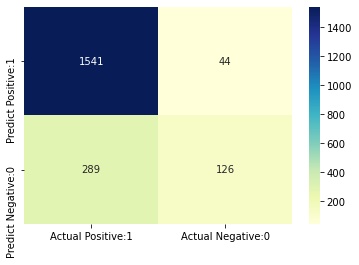

In [116]:
from sklearn.metrics import classification_report
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test, y_score1))

0.863875


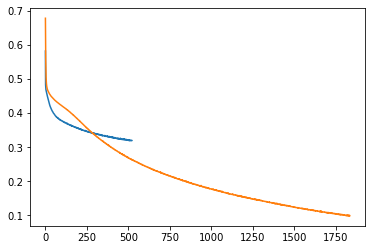

In [106]:
mlp=MLPClassifier(activation="relu",max_iter=3000)
mlp.fit(x_train,y_train)
print (mlp.score(x_train,y_train))
plt.plot(mlp.loss_curve_)
mlp.fit(x_val,y_val)
plt.plot(mlp.loss_curve_)


C:\Users\Acer\anaconda3\anaconda\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


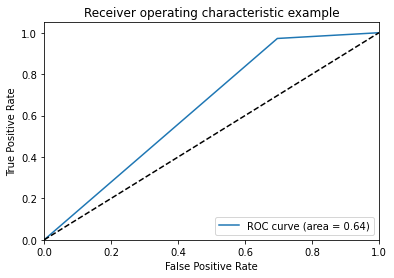

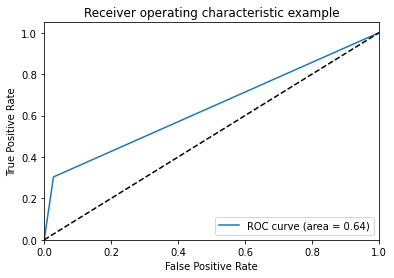

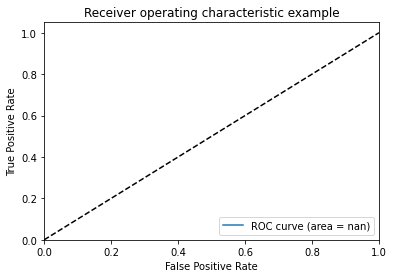

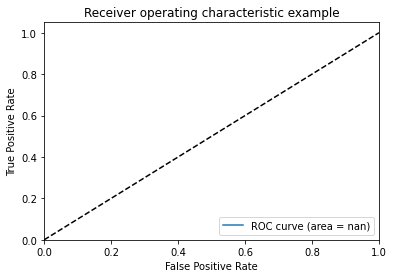

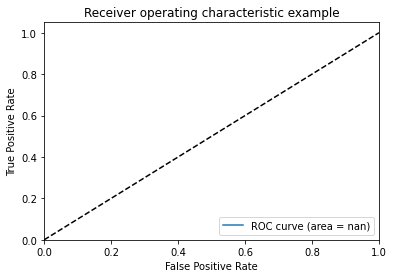

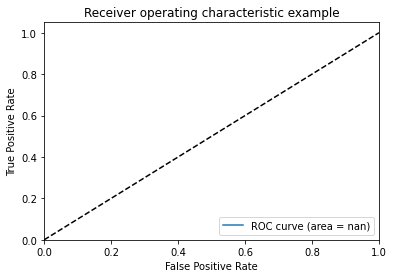

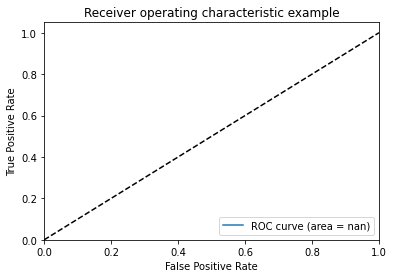

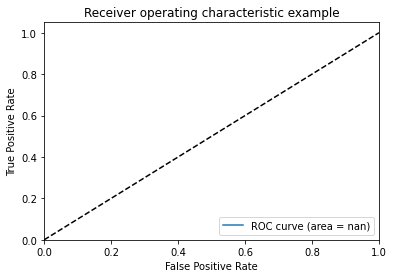

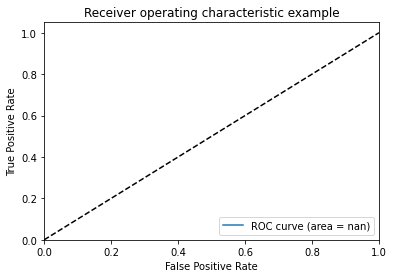

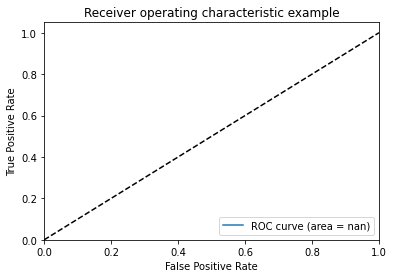

In [103]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

n_classes=10;
test_y2 = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
pred2 = label_binarize(y_score1, classes=[0,1,2,3,4,5,6,7,8,9])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_y2[:, i], pred2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


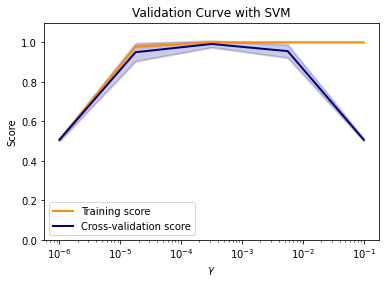

In [107]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)
subset_mask = np.isin(y, [0,1,2,3,4,5,6,7])  # binary classification: 1 vs 2
X, y = X[subset_mask], y[subset_mask]

param_range = np.logspace(-6, -1, 5)
y_score1,x_test = validation_curve(SVC(kernel='rbf', C =10, degree=3,coef0= 0.001,gamma= 'auto'), X, y, param_name="gamma", param_range=param_range
                                             , scoring="accuracy"
                                             , n_jobs=2)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()